In [1]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

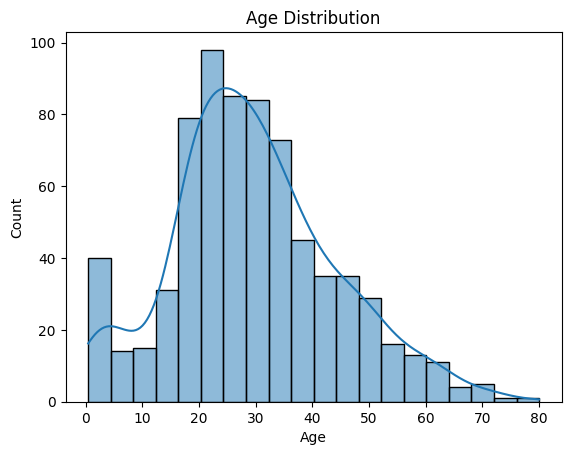

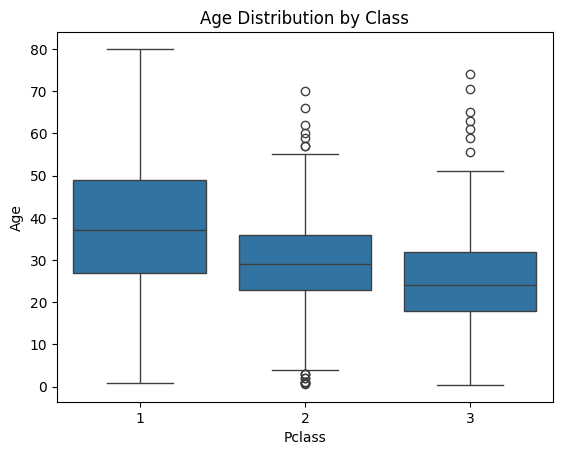

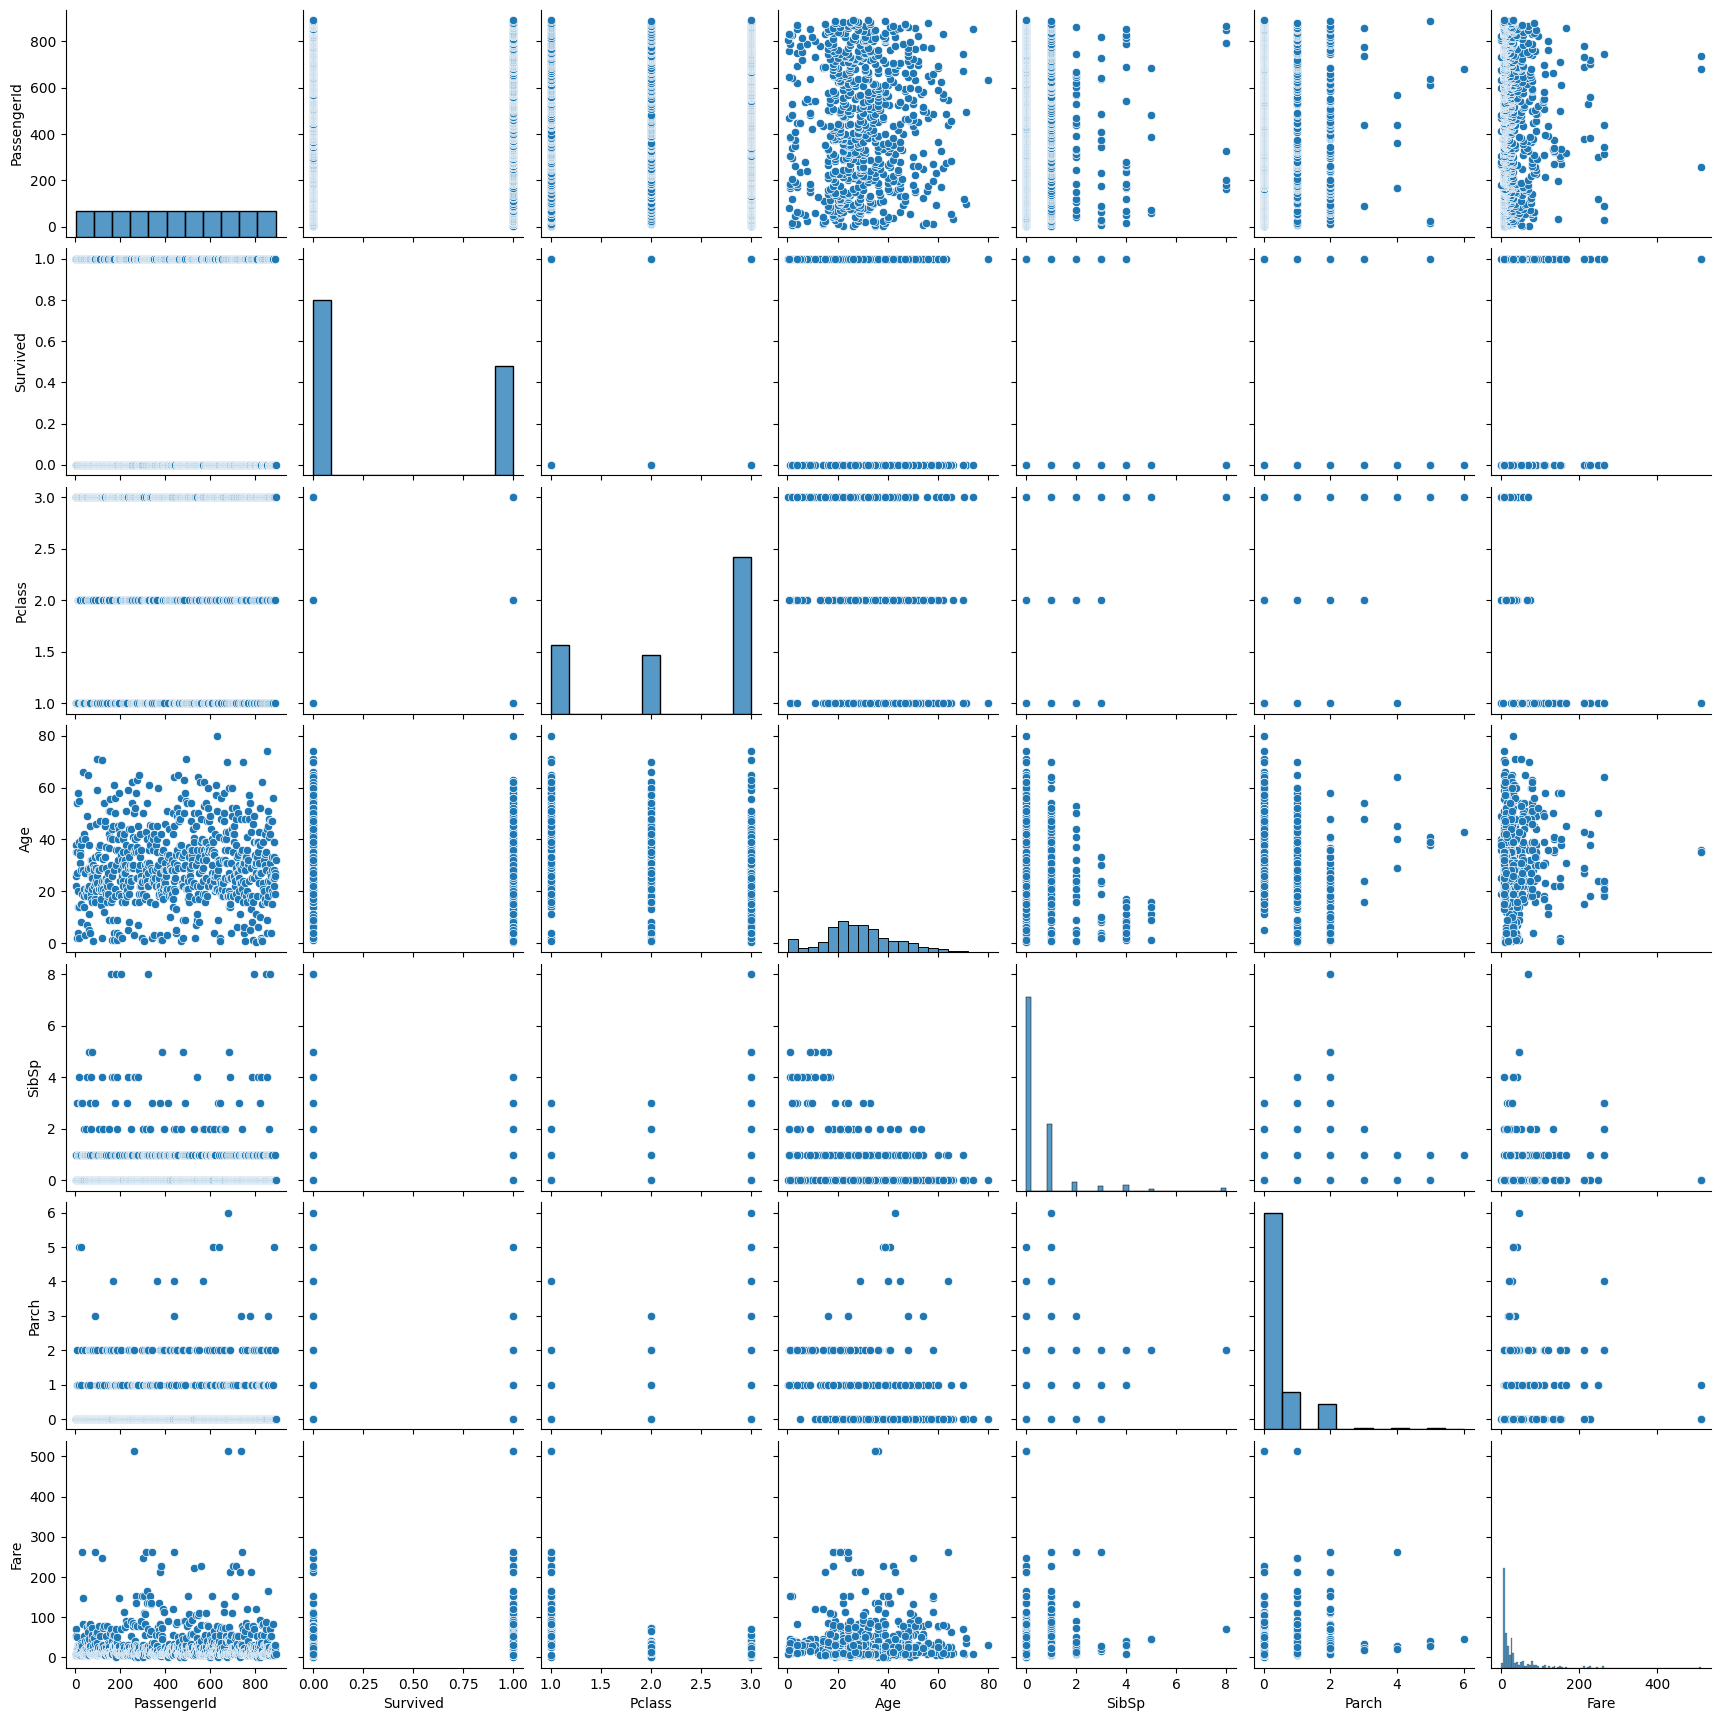

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.881981981981982


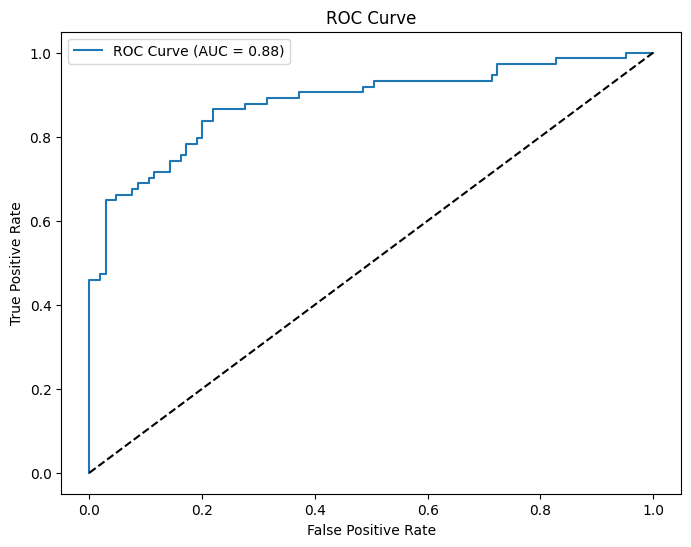

2024-06-12 15:00:52.952 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-06-12 15:00:52.956 Session state does not function when running a script without `streamlit run`


      Feature  Coefficient
0      Pclass    -0.785320
1         Age    -0.396010
2       SibSp    -0.349278
3       Parch    -0.096673
4        Fare     0.126579
5    Sex_male    -1.277180
6  Embarked_Q    -0.046344
7  Embarked_S    -0.189756


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import streamlit as st
import pickle

# Load the dataset
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')

# Display the first few rows of the dataframe
print(train_df.head())

# Summary statistics
print(train_df.describe())

# Check for missing values
print(train_df.isnull().sum())

# Data types of each column
print(train_df.dtypes)

# Visualize the distribution of each feature
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title('Age Distribution by Class')
plt.show()

sns.pairplot(train_df.select_dtypes(include=['number']))
plt.show()

# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Ensure the 'Survived' column is not dropped
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
if 'Survived' in columns_to_drop:
    columns_to_drop.remove('Survived')
train_df.drop(columns=columns_to_drop, inplace=True)

# Define features and target variable
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Save the feature names
feature_names = X.columns.tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

# Visualize the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Interpret the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
print(coefficients)

# Save the model, scaler, and feature names
with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(feature_names, file)

# Create a Streamlit app for deployment
st.title('Titanic Survival Prediction')
st.write('This app predicts the survival probability of Titanic passengers.')

# User inputs
pclass = st.selectbox('Pclass', [1, 2, 3])
age = st.slider('Age', 0, 100, 30)
sibsp = st.slider('Siblings/Spouses Aboard', 0, 10, 0)
parch = st.slider('Parents/Children Aboard', 0, 10, 0)
fare = st.slider('Fare', 0, 500, 50)
sex = st.selectbox('Sex', ['male', 'female'])
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])

# Preprocess the inputs
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Sex_male': [1 if sex == 'male' else 0],
    'Embarked_Q': [1 if embarked == 'Q' else 0],
    'Embarked_S': [1 if embarked == 'S' else 0]
})

# Ensure the input data has the same columns as the training data
for col in feature_names:
    if col not in input_data.columns:
        input_data[col] = 0
input_data = input_data[feature_names]

# Load the scaler and transform the input data
with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)
input_data = loaded_scaler.transform(input_data)

# Load the model and make predictions
with open('logreg_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
prediction = loaded_model.predict(input_data)
prediction_prob = loaded_model.predict_proba(input_data)[:, 1]

# Display the prediction
st.write(f'Survival Probability: {prediction_prob[0]:.2f}')
